In [1]:
# %pip install python-dotenv
# %pip install tweepy
# %pip install wordcloud

In [2]:
import pandas as pd
import pickle
import tweepy
import os
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from dotenv import load_dotenv

In [3]:
#load the .env VARIABLES.
#make sure to store the secret keys in .env file and save in root directory
load_dotenv()

#BEARER_TOKEN - need twitter developer access
bearer_token = os.environ['BEARER_TOKEN']

In [4]:
#Tweepy Client
client = tweepy.Client(bearer_token=bearer_token, wait_on_rate_limit=True)

#Query
query = 'pasend'

#Pagination: Max results of twitter per page is 100.
#Limit of query for essential dev access is 500k per month. Comment out this block of codes after first run 
#change the  limit to desired number of tweets
tweets = tweepy.Paginator(client.search_recent_tweets, query=query, tweet_fields=[
                          'context_annotations', 'created_at'], max_results=100).flatten(limit=100)


# Convert the search results into a pandas dataframe
df = pd.DataFrame(tweets)

# Print first five the tweet ids and tweets
df[['id', 'text']].head()

#store the df as pickle file
with open('pasend.pickle', 'wb') as handle:
    pickle.dump(df, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [5]:
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 1000)

In [6]:
#Reading the stored pickle object
with open('pasend.pickle', 'rb') as handle:
    df = pickle.load(handle)

print(df.head())

                 created_at edit_history_tweet_ids                   id                           text
0 2022-11-03 11:33:48+00:00  [1588132331583176704]  1588132331583176704            @ish4_l Pasend lods
1 2022-11-03 11:33:33+00:00  [1588132266592673792]  1588132266592673792  @JessyBee_14 Pasend hshshshsh
2 2022-11-03 11:33:24+00:00  [1588132231066750977]  1588132231066750977     @MangubatEdgar Pasend lods
3 2022-11-03 11:33:10+00:00  [1588132171503452160]  1588132171503452160     @MadihaQueen10 Pasend lods
4 2022-11-03 11:33:05+00:00  [1588132149575569408]  1588132149575569408     @Andrei12115798 Pasend tol


In [7]:
# convert df col to one string
text = " ".join(review for review in df.text)
text

'@ish4_l Pasend lods @JessyBee_14 Pasend hshshshsh @MangubatEdgar Pasend lods @MadihaQueen10 Pasend lods @Andrei12115798 Pasend tol @Andrei12115798 Pasend lods @Johnloy61079558 pasend nga dir @Johnloy61079558 Pasend po @bossmalubss Pasend po pls @Marvin45223670 pasend @LSementeryo pasend lods @bossmalubss Pasend po @satoruu044 pasend @Jaries111493 pasend @MangubatEdgar pasend sir @ehykhaye1094 @tsewydji Pasend @MangubatEdgar Pasend @Randomvidyus pasend @heyhey101403 @Shein_30 pasend @Andrei12115798 pasend @MadihaQueen10 Pasend po  hehehe @MangubatEdgar pasend @Anderson543213 Pasend @ArdeeAybee Pasend lods please @satoruu044 Pasend pasend po link baka may stocks pa 🤧 https://t.co/6aPiRM3ZKt @Craldr17157776 Pasend @CCKnightV_PS21 Pasend po @apoylonia Pasend agaw @apoylonia @sementeryoissue Pasend @Andrei12115798 Pasend @AmeAme4me Pasend @Mj_051503 pasend @CCKnightV_PS21 Pasend nga Ng viral? @Andrei12115798 Pasend @KwennyB pasend @Andrei12115798 Pasend @AmeAme4me Na follow na kita pasend 

In [8]:
#remove words that start with specific chars
stopchars = ['@','haha','HAHA','hehe']

for char in stopchars:
    text = " ".join(
        filter(
            lambda word: not word.startswith(char), text.split()
            )
        )
text

'Pasend lods Pasend hshshshsh Pasend lods Pasend lods Pasend tol Pasend lods pasend nga dir Pasend po Pasend po pls pasend pasend lods Pasend po pasend pasend pasend sir Pasend Pasend pasend pasend pasend Pasend po pasend Pasend Pasend lods please Pasend pasend po link baka may stocks pa 🤧 https://t.co/6aPiRM3ZKt Pasend Pasend po Pasend agaw Pasend Pasend Pasend pasend Pasend nga Ng viral? Pasend pasend Pasend Na follow na kita pasend po Pasend po Pasend poooo pasend Pasend po Pasend boss na follow na kita Pasend po idol Pasend po Pasend boss Pasend boss na follow na kita Pasend po idol Pasend po Pasend boss Pasend naman Pasend pasend po Pasend po Pasend Pasend Pasend boss Pasend boss Pasend Pasend pasend Pasend nmn pasend nga Po sementeryo Po Wala Po akong Pera pasend po Pasend pasend po Pasend 😅 Pasend Pasend po pls pasend ako viral😆🤝 Pasend RT pasend naman ng sagot pasend pasend po Pasend master hi pasend lods pasend po ano yung TG pasend pasend po pasend #pasend pasend poo pasend t

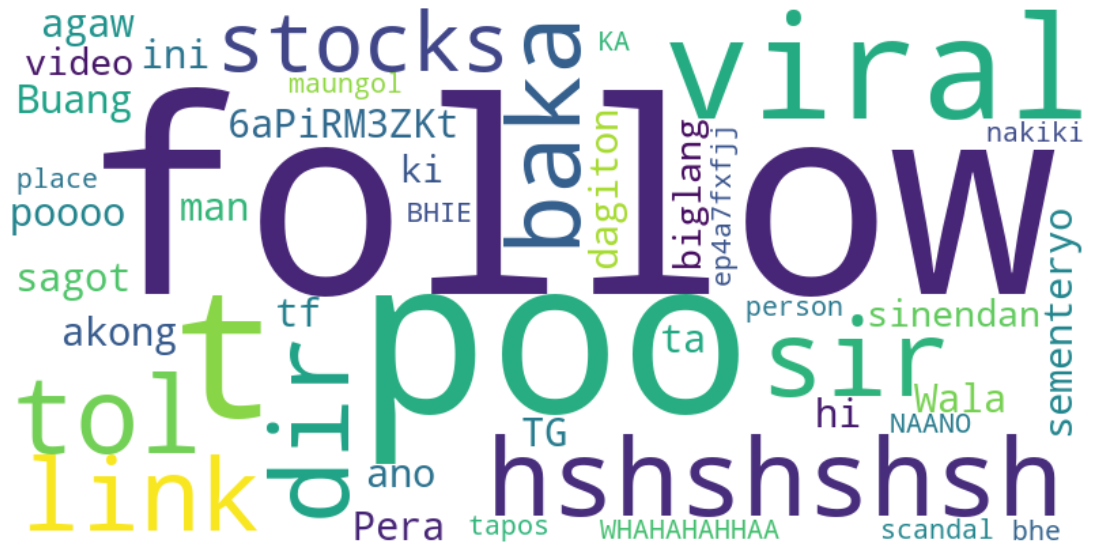

In [9]:
# Create and generate a word cloud image:
stopwords = set(STOPWORDS)
stopwords.update(["Pasend", "co", "po",  "https", "naman","lang","din","sa","ng","pls",
                  "yung","hehe","ko","nga","lod","ako","RT","na","s","please","trend",
                  "trending","mga","nung","May","daw","pa","di","kayo","ba","nmn","ang",
                  "kita","mag","yan","kasi","namn","nman","N","si","tong","bat",
                  "ma","say","anong","Hello","hello",
                  "boss","idol","master","pre","paps","lods"
                 ])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",width=800, height=400).generate(text)

plt.figure( figsize=(20,10) )
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
